In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

In [2]:
# api key for OpenWeatherMap
api_key = '0ef0e1e8cae0c9ce2fd55f511fb39ea6'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0ef0e1e8cae0c9ce2fd55f511fb39ea6&units=Imperial&q='

In [13]:
temp = []
lat = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        temp.append(weather_response["main"]['temp'])
        lat.append(weather_response['coord']['lat'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        
    except (KeyError, IndexError):
        pass
       

[73.4]
[73.4]
[73.4, 80.91]
[73.4, 80.91, 76.06]
[73.4, 80.91, 76.06]
[73.4, 80.91, 76.06, 28.99]
[73.4, 80.91, 76.06, 28.99, 70.29]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 4

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33,

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 5

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.8

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 8

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32]
[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86]
[73.4, 8

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

[73.4, 80.91, 76.06, 28.99, 70.29, 87.24, 57.65, 37.4, 59.23, 91.99, 82, 72.79, 37.18, 70, 35.89, 48.33, 65.39, 52.59, 82.8, 28.99, 80.06, 68.34, 51.8, 73.35, 41.65, 43.38, 77.07, 42.8, 81.93, 39.2, 50.5, 69.8, 85.71, 51.8, 50.94, 84.61, 46.99, 62.8, 86, 44.4, 84.27, 57.2, 53.49, 41, 66.09, 64.99, 75.18, 37.4, 55.85, 42.8, 59.49, 68.05, 77.88, 35.02, 71.6, 88, 73.4, 77, 80.6, 50, 59.41, 75.94, 77.09, 66.11, 86.4, 58.93, 64.51, 53.26, 41.67, 60.8, 47.19, 73.44, 57.34, 82.15, 71.92, 72.66, 71.1, 48, 64.76, 85.98, 72.77, 54, 44.6, 51.46, 80.53, 68.22, 62.2, 77, 56.84, 68, 97.97, 71.33, 63, 75.33, 59.5, 57.02, 68.34, 73.99, 51.49, 60.8, 93.2, 49.62, 75.96, 71.6, 77, 82.67, 62.6, 64.69, 79.54, 57.24, 73.4, 50, 68.29, 58.3, 61.5, 83.07, 59, 74.17, 59, 71.4, 66.2, 81.1, 59.58, 95.05, 66.7, 71.6, 61.43, 98.2, 56.34, 46.4, 70.39, 82.27, 44.78, 72.93, 47.14, 64.4, 87.75, 59.83, 73.15, 82.2, 94.12, 53.89, 65.3, 75.06, 57.02, 39.04, 72.32, 61.21, 75.2, 84.67, 61.02, 51.19, 51.8, 46.6, 86, 95, 83.6

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

C:\Users\marcu\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


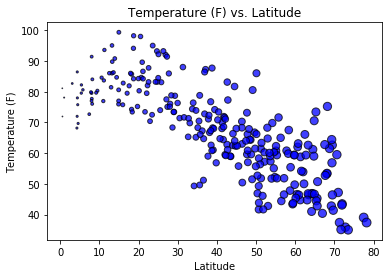

In [18]:
plt.scatter(lat, temp, marker='o', facecolors='blue', edgecolors='black', s=lat, alpha=0.75)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.show()
#This scatterplot shows a strong positive relationship between temperature and latitude.  


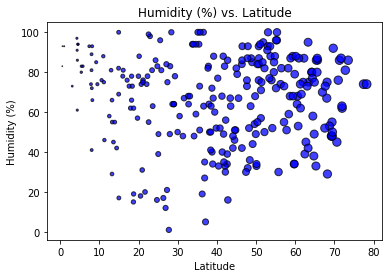

In [19]:
plt.scatter(lat, humidity, marker='o', facecolors='blue', edgecolors='black', s=lat, alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()
#This scatterplot shows a weak relationship between humidity and latitude.


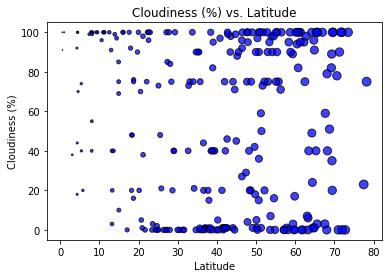

In [20]:
plt.scatter(lat, cloudiness, marker='o', facecolors='blue', edgecolors='black', s=lat, alpha=0.75)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()
#This scatterplot shows a weak relationship between cloudiness and latitude.


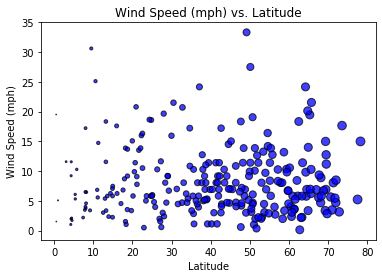

In [21]:
plt.scatter(lat, wind_speed, marker='o', facecolors='blue', edgecolors='black', s=lat, alpha=0.75)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()
#The scatterplot shows a weak relationship between the wind speed and latitude.